# Preparación del Notebook

In [1]:
### Carga de paquetes y librerias
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf #Framework para deep learning
from tensorflow import keras #API que contiene la mayoría de funciones para las RN

2024-05-20 18:19:57.495942: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### Carga de datos fasion_mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
#x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(np.unique(y_train, return_counts=True))

### Estandarización de los datos
x_train2 = x_train/255 # Valores entre 0 y 1
x_test2 = x_test/255
print(x_train2.shape)

### Dimensiones de la imagen
filas_img = 28
columnas_img = 28

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
(60000, 28, 28)


# ANN Base

In [3]:
### ANN 1: red neuronal base
ann1 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas_img, columnas_img]),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ]
)

### Compilacion de la ANN1 (Optimización de la Red)
ann1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

2024-05-20 18:30:32.234275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
history = ann1.fit(x_train2, y_train, epochs=15, validation_data=(x_test2, y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4901 - accuracy: 0.8260 - val_loss: 0.4199 - val_accuracy: 0.8503
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3669 - accuracy: 0.8662 - val_loss: 0.3677 - val_accuracy: 0.8660
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3317 - accuracy: 0.8787 - val_loss: 0.3556 - val_accuracy: 0.8720
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8852 - val_loss: 0.3616 - val_accuracy: 0.8732
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.8913 - val_loss: 0.3562 - val_accuracy: 0.8717
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.8966 - val_loss: 0.3577 - val_accuracy: 0.8731
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2656 - accuracy: 0.9017 - val_loss: 0.3518 - val_accuracy:

In [6]:
history.history.keys() # Diccionario con todas las metricas tanto con datos de train como de val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

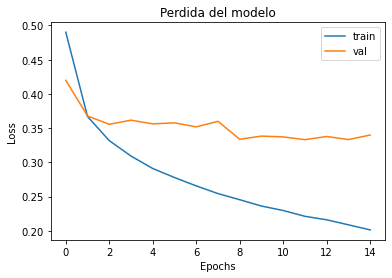

In [7]:
### Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

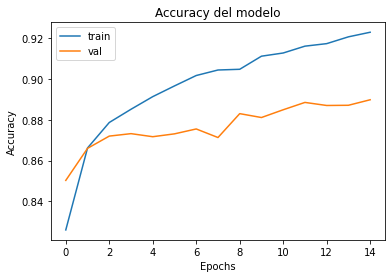

In [8]:
### Visualización de las curvas de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del modelo')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

# ANN regularizada - L2

In [10]:
from tensorflow.keras import regularizers

### ANN 2: red neuronal regularizada - L2
ann2 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas_img, columnas_img]),
        keras.layers.Dense(128, activation='relu', kernel_regularizer= regularizers.L2(l2=0.01)),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
        
    ]
)

### Compilacion de la ANN2 (Optimización de la Red)
ann2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history2 = ann2.fit(x_train2, y_train, epochs=15, validation_data=(x_test2, y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8315 - accuracy: 0.7904 - val_loss: 0.6576 - val_accuracy: 0.8087
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6096 - accuracy: 0.8193 - val_loss: 0.5906 - val_accuracy: 0.8245
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5722 - accuracy: 0.8280 - val_loss: 0.6366 - val_accuracy: 0.7960
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5521 - accuracy: 0.8311 - val_loss: 0.6640 - val_accuracy: 0.7837
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5314 - accuracy: 0.8376 - val_loss: 0.6143 - val_accuracy: 0.8204
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5209 - accuracy: 0.8400 - val_loss: 0.5435 - val_accuracy: 0.8361
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5082 - accuracy: 0.8437 - val_loss: 0.5406 - val_accuracy:

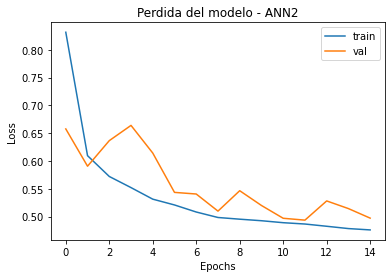

In [12]:
### Visualización de las curvas de error
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Perdida del modelo - ANN2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

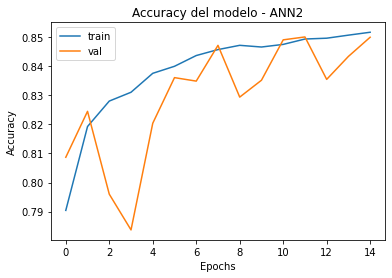

In [13]:
### Visualización de las curvas de accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy del modelo - ANN2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

# ANN Regularizada - Dropout

In [16]:
ann3 = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape = [filas_img, columnas_img]),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(10, activation='softmax')
    ]
)

### Compilacion de la ANN3 (Optimización de la Red)
ann3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history3 = ann3.fit(x_train2, y_train, epochs=15, validation_data=(x_test2, y_test))

Epoch 1/15
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5575 - accuracy: 0.8006 - val_loss: 0.4305 - val_accuracy: 0.8437
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4173 - accuracy: 0.8503 - val_loss: 0.3843 - val_accuracy: 0.8612
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3796 - accuracy: 0.8610 - val_loss: 0.3752 - val_accuracy: 0.8665
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3588 - accuracy: 0.8687 - val_loss: 0.3598 - val_accuracy: 0.8691
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3450 - accuracy: 0.8732 - val_loss: 0.3518 - val_accuracy: 0.8748
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3291 - accuracy: 0.8786 - val_loss: 0.3579 - val_accuracy: 0.8711
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3210 - accuracy: 0.8823 - val_loss: 0.3462 - val_accuracy:

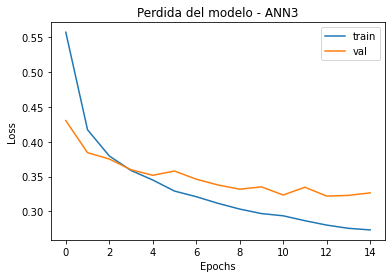

In [18]:
### Visualización de las curvas de error
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Perdida del modelo - ANN3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

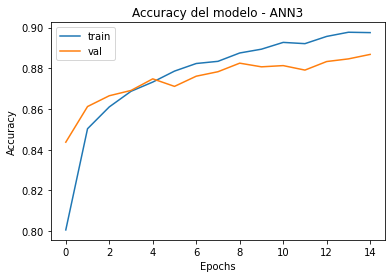

In [19]:
### Visualización de las curvas de accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy del modelo - ANN3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()